# Potrtofolio World Population with Linear Regression Prediction

## Import & Describe

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('WorldPopulation.csv')
df.shape

(70, 7)

In [3]:
df.head()

,Year,Population,ChangePerc,NetChange,Density,Urban,UrbanPerc
0,2020,7794798739,1.05,81330639,52,4378993944,56
1,2019,7713468100,1.08,82377060,52,4299438618,56
2,2018,7631091040,1.10,83232115,51,4219817318,55
3,2017,7547858925,1.12,83836876,51,4140188594,55
4,2016,7464022049,1.14,84224910,50,4060652683,54


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        70 non-null     int64  
 1   Population  70 non-null     int64  
 2   ChangePerc  70 non-null     float64
 3   NetChange   70 non-null     int64  
 4   Density     70 non-null     int64  
 5   Urban       70 non-null     int64  
 6   UrbanPerc   70 non-null     int64  
dtypes: float64(1), int64(6)
memory usage: 4.0 KB


In [5]:
df.isnull().sum()

Year          0
Population    0
ChangePerc    0
NetChange     0
Density       0
Urban         0
UrbanPerc     0
dtype: int64

## EDA

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,70.0,1.985500e+03,2.035109e+01,1.951000e+03,1.968250e+03,1.985500e+03,2.002750e+03,2.020000e+03
Population,70.0,5.002010e+09,1.594877e+09,2.584034e+09,3.570120e+09,4.915745e+09,6.361332e+09,7.794799e+09
ChangePerc,70.0,1.616429e+00,3.212883e-01,1.050000e+00,1.262500e+00,1.770000e+00,1.847500e+00,2.090000e+00
NetChange,70.0,7.511954e+07,1.256972e+07,4.674740e+07,7.314225e+07,7.942852e+07,8.356683e+07,9.290386e+07
Density,70.0,3.355714e+01,1.072399e+01,1.700000e+01,2.400000e+01,3.300000e+01,4.275000e+01,5.200000e+01
Urban,70.0,2.226815e+09,1.070191e+09,7.750677e+08,1.294408e+09,2.035272e+09,3.054260e+09,4.378994e+09
UrbanPerc,70.0,4.220000e+01,7.447595e+00,3.000000e+01,3.600000e+01,4.150000e+01,4.800000e+01,5.600000e+01


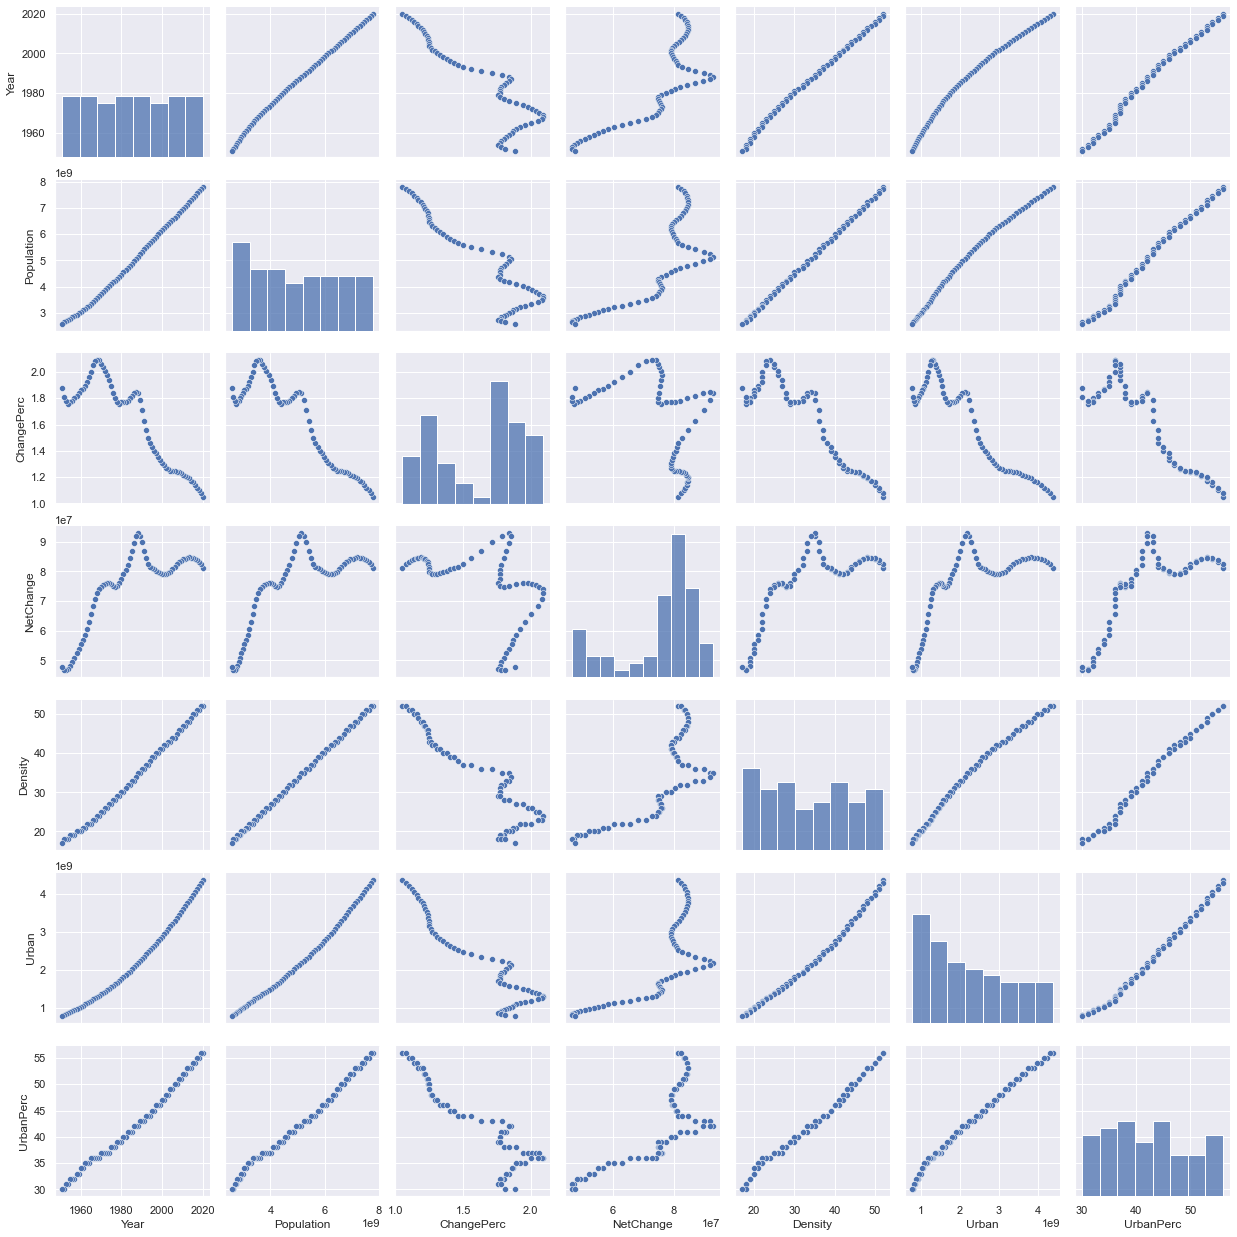

In [7]:
sns.set()
sns.pairplot(data=df)

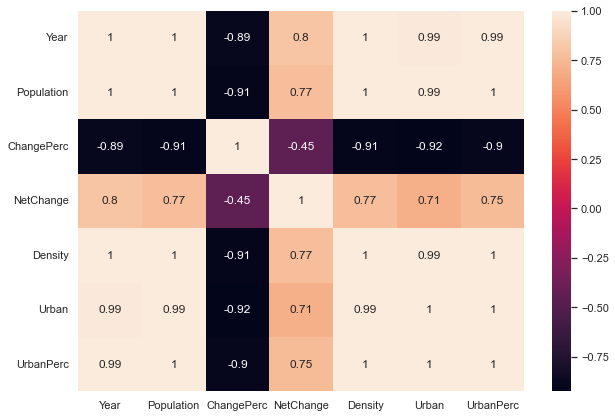

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,)
plt.show()

<BarContainer object of 70 artists>

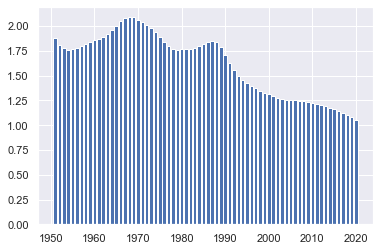

In [9]:
plt.bar(df['Year'], df['ChangePerc'])

## Split Data X and y

In [10]:
x= df.iloc[:, :-6].values
y= df.iloc[:, 1].values  

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0) 

In [11]:
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  

In [12]:
regressor.fit(x_train, y_train) 

LinearRegression()

In [13]:
y_pred= regressor.predict(x_test)  
x_pred= regressor.predict(x_train) 

regressor.score(x_test, y_test)

0.9946059046903974

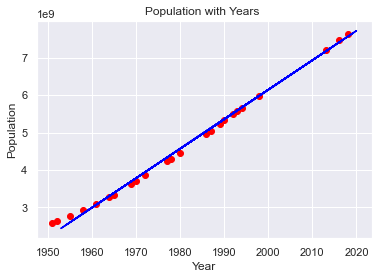

In [14]:
plt.scatter(x_test, y_test, color="red")   
plt.plot(x_train, x_pred, color="blue")    
plt.title("Population with Years ")  
plt.xlabel("Year")  
plt.ylabel("Population")  
plt.show()  

In [15]:
regressor.intercept_
regressor.coef_

print(regressor.intercept_)
print(regressor.coef_)

-151460301652.88126
[78801117.7313113]


## Forecast the population in recent 10 years

In [16]:
year=[2021,2022,2023,2024,2025,2026,2027,2028,2029,2030]
pop_10year=[]

for i in year:
    y= -151460301652.88126+78801117.7313113*i
    pop_10year.append(y)
    
print(pop_10year)

[7796757282.098907, 7875558399.8302, 7954359517.561523, 8033160635.292816, 8111961753.024139, 8190762870.755463, 8269563988.486755, 8348365106.218079, 8427166223.949371, 8505967341.680695]


In [17]:
prediction_pop10year = pd.DataFrame({'Year': 
                           ['2021', '2022',
                          '2023','2024',
                          '2025','2025',
                          '2026','2028','2029','2030'],
                        'Population': [7796757282, 7875558399, 7954359517, 8033160635, 8111961753, 8190762870, 8269563988, 8348365106, 8427166223, 8505967341]})
prediction_pop10year

,Year,Population
0,2021,7796757282
1,2022,7875558399
2,2023,7954359517
3,2024,8033160635
4,2025,8111961753
5,2025,8190762870
6,2026,8269563988
7,2028,8348365106
8,2029,8427166223
9,2030,8505967341


In [18]:
prediction_pop10year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        10 non-null     object
 1   Population  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


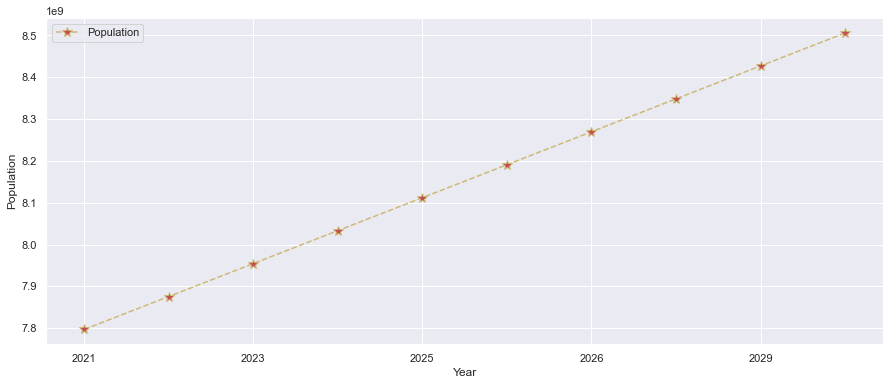

In [19]:
prediction_pop10year.columns = ['Year','Population']
prediction_pop10year.plot(x='Year',y='Population',figsize=(15,6),linestyle='--', marker='*', markerfacecolor='r',color='y',markersize=10)


plt.xlabel('Year')
plt.ylabel('Population')

plt.show()

In [20]:
prediction_pop10year

,Year,Population
0,2021,7796757282
1,2022,7875558399
2,2023,7954359517
3,2024,8033160635
4,2025,8111961753
5,2025,8190762870
6,2026,8269563988
7,2028,8348365106
8,2029,8427166223
9,2030,8505967341


In [21]:
prediction_pop10year.describe()

,Population
count,1.000000e+01
mean,8.151362e+09
std,2.385822e+08
min,7.796757e+09
25%,7.974060e+09
50%,8.151362e+09
75%,8.328665e+09
max,8.505967e+09
